![FIT_CTU_LOGO](https://fit.cvut.cz/media-a-pr/corporate-identity/logo-fit-en-cerna.svg)
# FIT ČVUT v Praze, [BI-PST](https://courses.fit.cvut.cz/BI-PST), ZS 2021/2022
## Domácí úloha - Daniel Bukač, Alexandr Czerný
## Data a parametry
Ze své trojice vyberte reprezentanta. Úlohu odevzdejte cvičícímu, ke kterému reprezentant přísluší podle původního přiřazení paralelek v Kosu. Parametry úlohy spočtěte následovně:

- K = den narození reprezentanta skupiny (1-31),
- L = počet písmen v příjmení reprezentanta,
- M = ((K+L)*47)mod(11)+1.

Načtěte datový soubor z R knihovny Sleuth2 podle následující tabulky:

|M|Datový soubor|Popis|
|:-:|:-------------:|:-----|
|1|case0101|skóre v kreativitě dle typu motivace|
|2|case0102|mzda dle pohlaví|
|3|case0201|délka humeru dle přežití vrabců|
|4|case0202|objem hipokampu dle schizofrenie|
|5|case0301|srážky dle ošetření mraků|
|6|case0302|koncentrace dioxinu dle vojenského působiště|
|7|case0402|doba řešení úkolu dle typu výuky geometrie|
|8|ex0112|krevní tlak dle diety|
|9|ex0211|přežití morčat dle typu experimentu|
|10|ex0221|váha dle přežití vrabců|
|11|ex0222|hladina cholesterolu dle prostředí|

## Úkoly

1. **(1b)** Načtěte datový soubor a rozdělte sledovanou proměnnou na příslušné dvě pozorované skupiny. Stručně popište data a zkoumaný problém. Pro každu skupinu zvlášť odhadněte střední hodnotu, rozptyl a medián příslušného rozdělení.
2. **(1b)** Pro každou skupinu zvlášť odhadněte hustotu a distribuční funkci pomocí histogramu a empirické distribuční funkce.
3. **(3b)** Pro každou skupinu zvlášť najděte nejbližší rozdělení: Odhadněte parametry normálního, exponenciálního a rovnoměrného rozdělení. Zaneste příslušné hustoty s odhadnutými parametry do grafů histogramu. Diskutujte, které z rozdělení odpovídá pozorovaným datům nejlépe.
4. **(1b)** Pro každou skupinu zvlášť vygenerujte náhodný výběr o 100 hodnotách z rozdělení, které jste zvolili jako nejbližší, s parametry odhadnutými v předchozím bodě. Porovnejte histogram simulovaných hodnot s pozorovanými daty.
5. **(1b)** Pro každou skupinu zvlášť spočítejte oboustranný 95% konfidenční interval pro střední hodnotu.
6. **(1b)** Pro každou skupinu zvlášť otestujte na hladině významnosti 5 % hypotézu, zda je střední hodnota rovná hodnotě K (parametr úlohy), proti oboustranné alternativě. Můžete použít buď výsledek z předešlého bodu, nebo výstup z příslušné vestavěné funkce vašeho softwaru.
7. **(2b)** Na hladině významnosti 5 % otestujte, jestli mají pozorované skupiny stejnou střední hodnotu. Typ testu a alternativy stanovte tak, aby vaše volba nejlépe korespondovala s povahou zkoumaného problému.

### Retrieve dataset from R library

In [74]:
### import required libraries

import math
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from scipy.stats import norm, expon, uniform, ttest_1samp, ttest_ind, t as students_t_distr

Podle následujícího výpočtu jsme zvolili datovou sadu **case0302**:

In [66]:
K = 15
L = len("Bukac")
M = ((K + L) * 47) % (11) + 1
print(">>> {}".format(M))

>>> 6


### Úkol 1
(1b) **Načtěte datový soubor a rozdělte sledovanou proměnnou na příslušné dvě pozorované skupiny. Stručně popište data a zkoumaný problém. Pro každu skupinu zvlášť odhadněte střední hodnotu, rozptyl a medián příslušného rozdělení.**

**FIXME:** Discuss dataset and data structure

In [3]:
### load and split dataset

data = pd.read_csv("./data.csv")
data_vietnam = data[data.Veteran == "Vietnam"]
data_other = data[~(data.Veteran == "Vietnam")]

### preview data
display(data)

,Dioxin,Veteran
0,0,Vietnam
1,0,Vietnam
2,0,Vietnam
3,0,Vietnam
4,0,Vietnam
...,...,...
738,9,Other
739,9,Other
740,10,Other
741,11,Other


In [4]:
### estimate expected value, variance and median of given distributions

### vietnam group estimations
E_vietnam = data_vietnam.Dioxin.mean()
VAR_vietnam = data_vietnam.Dioxin.var()
median_vietnam = data_vietnam.Dioxin.median()

### other group estimations
E_other = data_other.Dioxin.mean()
VAR_other = data_other.Dioxin.var()
median_other = data_other.Dioxin.median()

### display results
print("Vietnam group estimated values:")
print(">>> Expected value:", E_vietnam)
print(">>> Variance:", VAR_vietnam)
print(">>> Median:", median_vietnam)
print()
print("Other group estimated values:")
print(">>> Expected value:", E_other)
print(">>> Variance:", VAR_other)
print(">>> Median:", median_other)

Vietnam group estimated values:
>>> Expected value: 4.260061919504644
>>> Variance: 6.98342573259414
>>> Median: 4.0

Other group estimated values:
>>> Expected value: 4.185567010309279
>>> Variance: 5.298539518900344
>>> Median: 4.0


### Úkol 2
(1b) **Pro každou skupinu zvlášť odhadněte hustotu a distribuční funkci pomocí histogramu a empirické distribuční funkce.**

**FIXME:** Discuss results

[Text(0.5, 1.0, 'Vietnam group - density'),
 Text(0.5, 0, 'Dioxin concentration')]

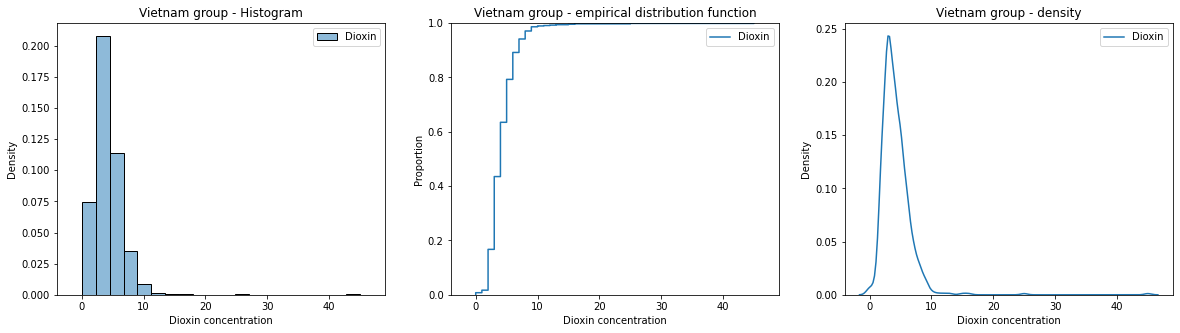

In [62]:
### vietnam group - histogram, distribution function, density

fig, (ax1, ax2, ax3) = plt.subplots(
    ncols=3,
    sharex=True,
    figsize=(20, 5)
)
ax1 = sb.histplot(
    data=data_vietnam,
    bins=20,
    stat="density",
    ax=ax1
)
ax2 = sb.ecdfplot(
    data=data_vietnam,
    ax=ax2
)
ax3 = sb.kdeplot(
    data=data_vietnam,
    bw_adjust=.75,
    ax=ax3
)
ax1.set(
    title="Vietnam group - Histogram",
    xlabel="Dioxin concentration"
)
ax2.set(
    title="Vietnam group - empirical distribution function",
    xlabel="Dioxin concentration"
)
ax3.set(
    title="Vietnam group - density",
    xlabel="Dioxin concentration"
)

[Text(0.5, 1.0, 'Other group - density'), Text(0.5, 0, 'Dioxin concentration')]

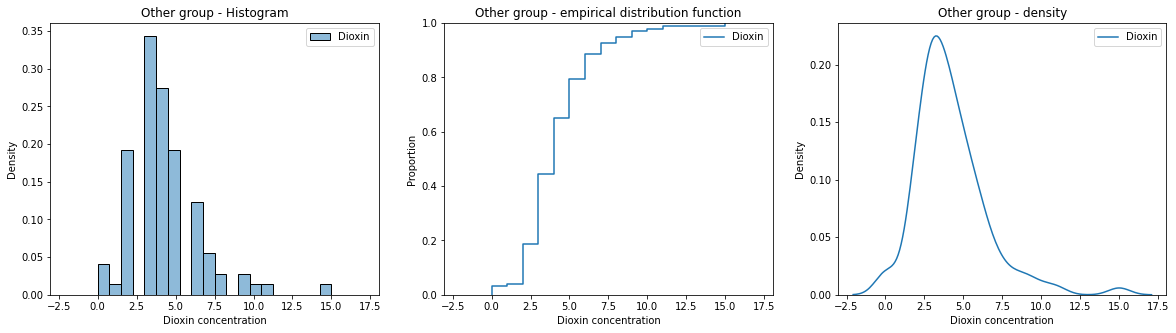

In [63]:
### other group - histogram, distribution function, density

fig, (ax1, ax2, ax3) = plt.subplots(
    ncols=3,
    sharex=True,
    figsize=(20, 5)
)
ax1 = sb.histplot(
    data=data_other,
    bins=20,
    stat="density",
    ax=ax1
)
ax2 = sb.ecdfplot(
    data=data_other,
    ax=ax2
)
ax3 = sb.kdeplot(
    data=data_other,
    bw_adjust=.75,
    ax=ax3
)
ax1.set(
    title="Other group - Histogram",
    xlabel="Dioxin concentration"
)
ax2.set(
    title="Other group - empirical distribution function",
    xlabel="Dioxin concentration"
)
ax3.set(
    title="Other group - density",
    xlabel="Dioxin concentration"
)

### Úkol 3
(3b) **Pro každou skupinu zvlášť najděte nejbližší rozdělení: Odhadněte parametry normálního, exponenciálního a rovnoměrného rozdělení. Zaneste příslušné hustoty s odhadnutými parametry do grafů histogramu. Diskutujte, které z rozdělení odpovídá pozorovaným datům nejlépe.**

**FIXME:** Discuss results

In [70]:
### vietnam group - estimated distribution parameters

viet_norm_distr_expected_value, viet_norm_distr_std_deviance = norm.fit(data_vietnam.Dioxin, method="MLE")
viet_expon_distr_expected_value, viet_expon_distr_std_deviance = expon.fit(data_vietnam.Dioxin, floc=0, method="MLE")
viet_uniform_distr_a, viet_uniform_distr_b = uniform.fit(data_vietnam.Dioxin, method="MLE")

print("Vietnam group - estimated distribution parameters")
print(">>> Normal distribution -> 𝝁 = {}, 𝛔 = {}".format(
    viet_norm_distr_expected_value,
    viet_norm_distr_std_deviance ** 2
))
print(">>> Exponential distribution -> 𝛌 = {}".format(
    1 / viet_expon_distr_std_deviance
))
print(">>> Uniform distribution -> 𝐚 = {}, 𝐛 = {}".format(
    viet_uniform_distr_a,
    viet_uniform_distr_a + viet_uniform_distr_b
))

Vietnam group - estimated distribution parameters
>>> Normal distribution -> 𝝁 = 4.260061919504644, 𝛔 = 6.9726154760421375
>>> Exponential distribution -> 𝛌 = 0.23473837209302323
>>> Uniform distribution -> 𝐚 = 0.0, 𝐛 = 45.0


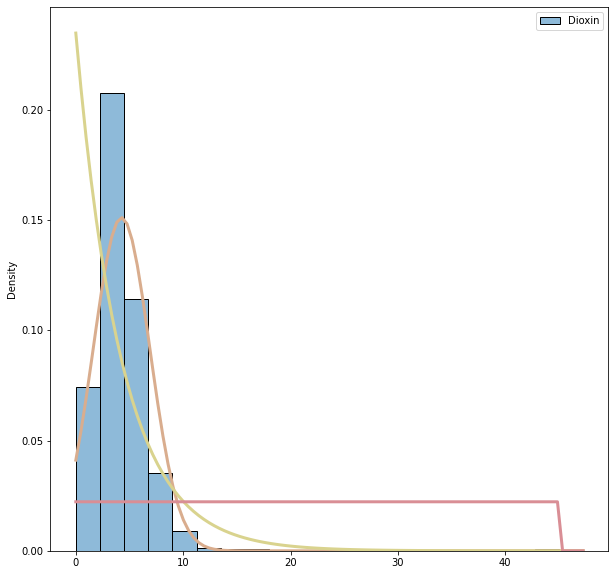

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
sb.histplot(
    data=data_vietnam,
    bins=20,
    stat="density",
    kde=False
)
_, xmax = plt.xlim()
x_axis_values = np.linspace(0, xmax, 100)
norm_distr_pdf = norm.pdf(x_axis_values, viet_norm_distr_expected_value, viet_norm_distr_std_deviance)
expon_distr_pdf = expon.pdf(x_axis_values, viet_expon_distr_expected_value, viet_expon_distr_std_deviance)
uniform_distr_pdf = uniform.pdf(x_axis_values, viet_uniform_distr_a, viet_uniform_distr_b)
sb.lineplot(x=x_axis_values, y=norm_distr_pdf, color="#d9ad8e", linewidth=3)
sb.lineplot(x=x_axis_values, y=expon_distr_pdf, color="#d9d38e", linewidth=3)
sb.lineplot(x=x_axis_values, y=uniform_distr_pdf, color="#d98e95", linewidth=3)
plt.show()

In [69]:
### other group - estimated distribution parameters

other_norm_distr_expected_value, other_norm_distr_std_deviance = norm.fit(data_other.Dioxin, method="MLE")
other_expon_distr_expected_value, other_expon_distr_std_deviance = expon.fit(data_other.Dioxin, method="MLE")
other_uniform_distr_a, other_uniform_distr_b = uniform.fit(data_other.Dioxin, method="MLE") 

print("Other group - estimated distribution parameters")
print(">>> Normal distribution -> 𝝁 = {}, 𝛔 = {}".format(
    other_norm_distr_expected_value,
    other_norm_distr_std_deviance
))
print(">>> Exponential distribution -> 𝛌 = {}".format(
    1 / other_expon_distr_std_deviance
))
print(">>> Uniform distribution -> 𝐚 = {}, 𝐛 = {}".format(
    other_uniform_distr_a,
    other_uniform_distr_a + other_uniform_distr_b
))

Other group - estimated distribution parameters
>>> Normal distribution -> 𝝁 = 4.185567010309279, 𝛔 = 2.2899596940009213
>>> Exponential distribution -> 𝛌 = 0.23891625615763545
>>> Uniform distribution -> 𝐚 = 0.0, 𝐛 = 15.0


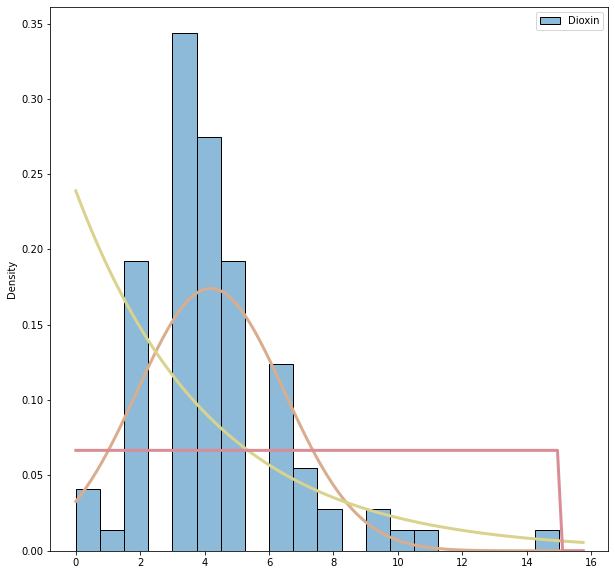

In [71]:
fig, ax = plt.subplots(figsize=(10, 10))
sb.histplot(
    data=data_other,
    bins=20,
    stat="density",
    kde=False
)
_, xmax = plt.xlim()
x_axis_values = np.linspace(0, xmax, 100)
norm_distr_pdf = norm.pdf(x_axis_values, other_norm_distr_expected_value, other_norm_distr_std_deviance)
expon_distr_pdf = expon.pdf(x_axis_values, other_expon_distr_expected_value, other_expon_distr_std_deviance)
uniform_distr_pdf = uniform.pdf(x_axis_values, other_uniform_distr_a, other_uniform_distr_b)
sb.lineplot(x=x_axis_values, y=norm_distr_pdf, color="#d9ad8e", linewidth=3)
sb.lineplot(x=x_axis_values, y=expon_distr_pdf, color="#d9d38e", linewidth=3)
sb.lineplot(x=x_axis_values, y=uniform_distr_pdf, color="#d98e95", linewidth=3)
plt.show()

### Úkol 4
(1b) **Pro každou skupinu zvlášť vygenerujte náhodný výběr o 100 hodnotách z rozdělení, které jste zvolili jako nejbližší, s parametry odhadnutými v předchozím bodě. Porovnejte histogram simulovaných hodnot s pozorovanými daty.**

**FIXME:** Discuss results

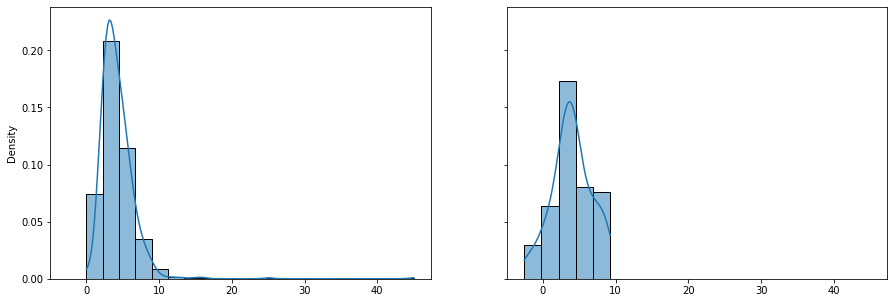

In [72]:
### vietnam group - data comparison

data_vietnam_simulated = np.random.normal(
    loc=viet_norm_distr_expected_value,
    scale=viet_norm_distr_std_deviance,
    size=100
)

fig, (ax1, ax2) = plt.subplots(
    ncols=2,
    sharex=True,
    sharey=True,
    figsize=(15, 5)
)
ax1 = sb.histplot(
    data_vietnam,
    bins=20,
    stat="density",
    kde=True,
    ax=ax1,
    legend=False
)
ax2 = sb.histplot(
    data_vietnam_simulated,
    bins=5,
    stat="density",
    kde=True,
    ax=ax2
)

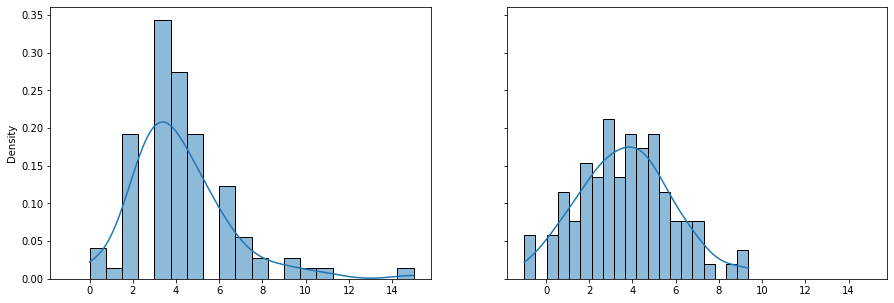

In [73]:
### other group - data comparison

data_other_simulated = np.random.normal(
    loc=other_norm_distr_expected_value,
    scale=other_norm_distr_std_deviance,
    size=100
)

fig, (ax1, ax2) = plt.subplots(
    ncols=2,
    sharex=True,
    sharey=True,
    figsize=(15, 5)
)
ax1 = sb.histplot(
    data_other,
    bins=20,
    stat="density",
    kde=True,
    ax=ax1,
    legend=False
)
ax2 = sb.histplot(
    data_other_simulated,
    bins=20,
    stat="density",
    kde=True,
    ax=ax2
)

### Úkol 5
(1b) **Pro každou skupinu zvlášť spočítejte oboustranný 95% konfidenční interval pro střední hodnotu.**

**FIXME:** Discuss results

In [22]:
### vietnam group - 95% confidence interval for expected value

mean = data_vietnam.Dioxin.mean()
std = data_vietnam.Dioxin.std()
count = data_vietnam.Dioxin.count()
t = students_t_distr.ppf(q=1 - 0.025, df=count - 1)
L_viet = mean - t * std / math.sqrt(count)
U_viet = mean + t * std / math.sqrt(count)
print(">>> ({}, {})".format(L_viet, U_viet))

>>> (4.05589668169332, 4.464227157315968)


In [23]:
### other group - 95% confidence interval for expected value

mean = data_other.Dioxin.mean()
std = data_other.Dioxin.std()
count = data_other.Dioxin.count()
t = students_t_distr.ppf(q=1 - 0.025, df=count - 1)
L_other = mean - t * std / math.sqrt(count)
U_other = mean + t * std / math.sqrt(count)
print(">>> ({}, {})".format(L_other, U_other))

>>> (3.721640382345717, 4.64949363827284)


### Úkol 6

(1b) **Pro každou skupinu zvlášť otestujte na hladině významnosti 5 % hypotézu, zda je střední hodnota rovná hodnotě K (parametr úlohy), proti oboustranné alternativě. Můžete použít buď výsledek z předešlého bodu, nebo výstup z příslušné vestavěné funkce vašeho softwaru.**

**FIXME:** Selecth method (scipy 1samp_ttest vs. using confidence interval from task 5) and discuss results

In [42]:
### vietnam_group

K = 15
alpha = 0.05
viet_statistic, viet_pvalue = ttest_1samp(data_vietnam.Dioxin, K, alternative="two-sided")
print(">>> {}, {}".format(viet_statistic, viet_pvalue))

### Testujeme hypotézu o střední hodnotě normálního rozdělení proti oboustranné alternativě, tedy
### H0 : 𝝁 = K proti HA : 𝝁 != K
### Potřebujeme tedy oboustranný (1 - α)% interval spolehlivosti.
### Rozptyl rozdělení je neznámý, tedy interval sestavíme pomocí Studentova rozdělení.
### Tento interval jsme ovšem spočítali v minulém úkolu a tedy dostáváme interval
### (L, U) = (3.721640382345717, 4.64949363827284)
### Pokud testovanou hodnotu K interval pokrývá, hypotézu H0 tedy na hladině významnosti 5% nezamítáme.
### V opačném případě hypotézu H0 zamítneme a přijmeme alternativní hypotézu HA.

>>> -103.29606486224891, 0.0


In [37]:
### other group

K = 15
alpha = 0.05
other_statistic, other_pvalue = ttest_1samp(data_other.Dioxin, K)
print(">>> {}, {}".format(other_statistic, other_pvalue))

### Testujeme hypotézu o střední hodnotě normálního rozdělení proti oboustranné alternativě, tedy
### H0 : 𝝁 = K proti HA : 𝝁 != K
### Potřebujeme tedy oboustranný (1 - α)% interval spolehlivosti.
### Rozptyl rozdělení je neznámý, tedy interval sestavíme pomocí Studentova rozdělení.
### Tento interval jsme ovšem spočítali v minulém úkolu a tedy dostáváme interval
### (L, U) = (3.721640382345717, 4.64949363827284)
### Pokud testovanou hodnotu K interval pokrývá, hypotézu H0 tedy na hladině významnosti 5% nezamítáme.
### V opačném případě hypotézu H0 zamítneme a přijmeme alternativní hypotézu HA.

>>> -46.27128198222826, 1.9220186618312877e-67


### Úkol 7
(2b) **Na hladině významnosti 5 % otestujte, jestli mají pozorované skupiny stejnou střední hodnotu. Typ testu a alternativy stanovte tak, aby vaše volba nejlépe korespondovala s povahou zkoumaného problému.**

**FIXME:** Interpret results, check if ttest_ind is valid function for this use case 

In [79]:
alpha = 0.05
statistic, pvalue = ttest_ind(data_vietnam.Dioxin, data_other.Dioxin)
print(">>> {}, {}".format(statistic, pvalue))

>>> 0.2630243111769849, 0.7926049565355645
